In [73]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification, make_moons
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import StandardScaler
import time
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import roc_curve, auc, classification_report

# Data preparation

In [2]:
X, y = make_classification(
    n_samples=2502, 
    random_state=259202, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_repeated=0, 
    class_sep=2)
Xm, ym = make_moons(n_samples=2502, random_state=259202)

In [3]:
X.shape

(2502, 2)

In [4]:
def plot_data(X, y, title=""):
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
    plt.title(title)
    plt.show()

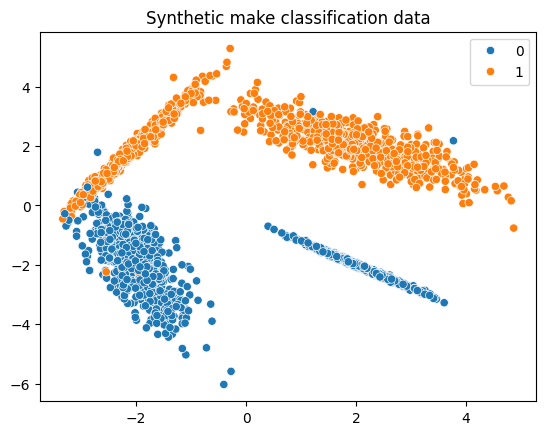

In [5]:
plot_data(X,y, "Synthetic make classification data")

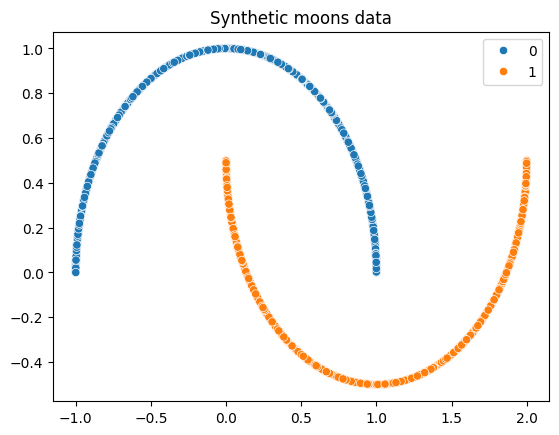

In [6]:
plot_data(Xm,ym, "Synthetic moons data")

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=259202)

Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    Xm, ym, random_state=259202)

# Implementation of Logistic regression

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [55]:
def logistic_regression(X, y, lr = 0.01, max_iter=10000, eps=1e-6):
    X_ = np.hstack([np.ones((X.shape[0],1)), X]) # declaring shape (X.shape[0],1)
    w = np.zeros(X_.shape[1])
    
    for i in range(max_iter):
        w_old = w.copy()
        for j in range(X_.shape[0]):
            xj = X_[j]
            tj = y[j]
            zj = xj @ w # x(j).T @ w(j-1)
            yj = sigmoid(zj)
            delta = -lr * (tj - yj) * yj * (1 - yj) * xj
            w -= delta
            
        if np.linalg.norm(w - w_old) < eps:
            print(f"Converged after {i+1} iterations")
            break

    return w

In [56]:
w = logistic_regression(X_train, y_train, lr=0.1)

Converged after 1851 iterations


In [59]:
X_test_ = np.hstack([np.ones((X_test.shape[0],1)),X_test])
y_score = sigmoid(X_test_ @ w)
y_pred = ( y_score >= 0.5).astype(int)

acc_implemented = accuracy_score(y_test,y_pred)

print(f"Implemented LR accuracy: {acc_implemented}")

Implemented LR accuracy: 0.9920127795527156


In [60]:
def plot_decision_boundary(w, X, y):
    
    # mesh grid
    h = 0.02 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # decision function
    Z = w[0] + w[1] * xx + w[2] * yy
    Z = Z.reshape(xx.shape)
    
    # print("Z:", Z, Z.shape)
    
    plt.figure(figsize=(8, 6))
    
    # decision boundary
    plt.contourf(xx, yy, Z > 0.5, alpha=0.3)
    
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
        
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title("Decision boundary implemented")
    plt.show()

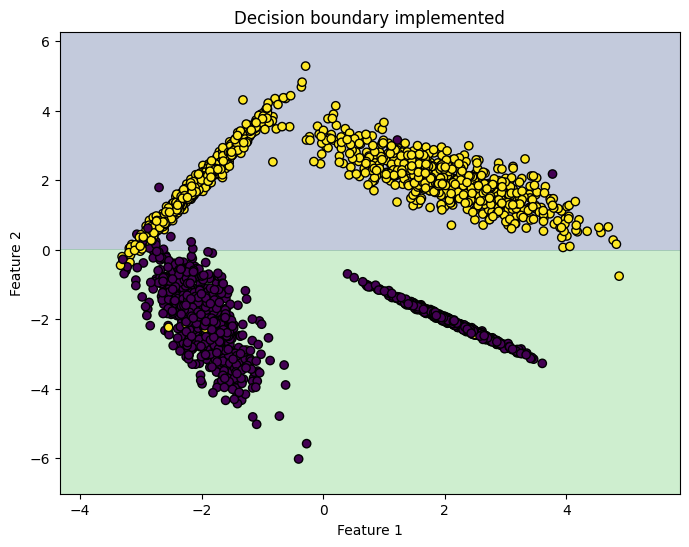

In [53]:
plot_decision_boundary(w, X, y)

In [61]:
wm = logistic_regression(Xm_train, ym_train, lr=0.1)

Converged after 96 iterations


In [63]:
Xm_test_ = np.hstack([np.ones((Xm_test.shape[0],1)), Xm_test])
ym_score = sigmoid(Xm_test_ @ wm)
ym_pred = (ym_score >= 0.5).astype(int)

accuracym_implemented = accuracy_score(ym_test,ym_pred)

print(f"Implemented LR accuracy: {accuracym_implemented}")

Implemented LR accuracy: 0.8977635782747604


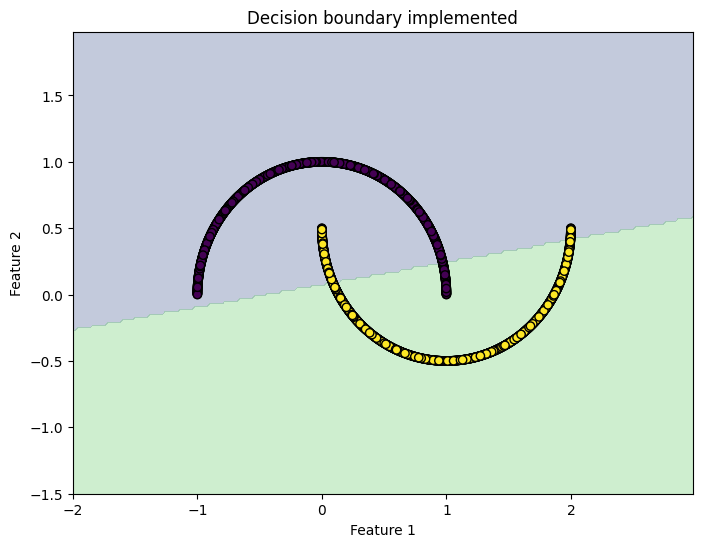

In [64]:
plot_decision_boundary(wm, Xm, ym)

# Built in classifier

make_classification dataset

In [44]:
clf = LogisticRegression().fit(X_train, y_train)
y_pred_skl = clf.predict(X_test)
y_score_skl = clf.predict_proba(X_test)[:,1] # second column in for positive class -> we need this for roc

accuracy_skl = accuracy_score(y_test, y_pred_skl)

In [19]:
accuracy_skl

0.9920127795527156

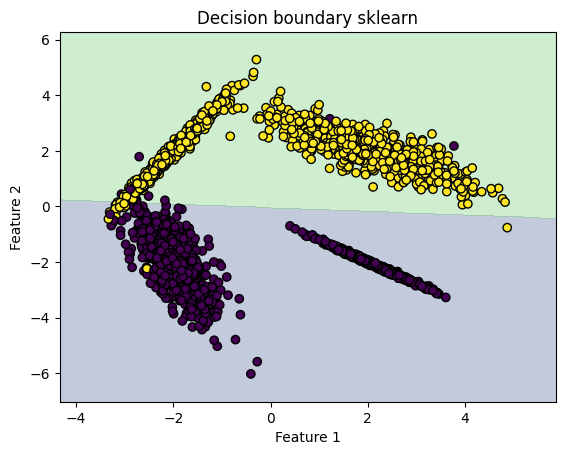

In [20]:
def plot_decision_boundary_clf(X, y, clf):
    h = 0.02
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z > 0, alpha=0.3)
        
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title("Decision boundary sklearn")
    plt.show()
    
plot_decision_boundary_clf(X, y, clf)

moons dataset

In [68]:
clfm = LogisticRegression().fit(Xm_train,ym_train)
ym_pred_skl = clfm.predict(Xm_test)
ym_score_skl = clfm.predict_proba(Xm_test)[:,1]

accuracym_skl = accuracy_score(ym_test, ym_pred_skl)

In [69]:
accuracym_skl

0.8993610223642172

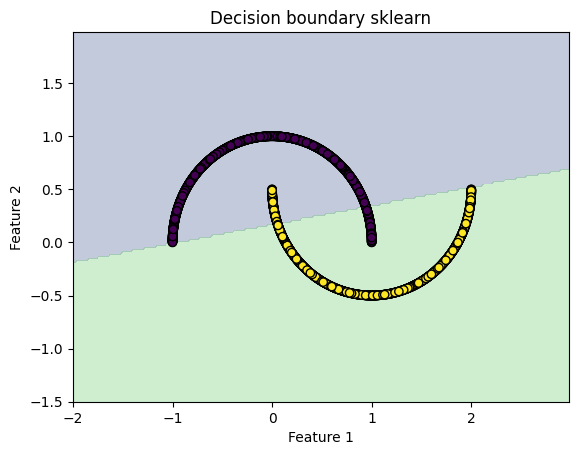

In [70]:
plot_decision_boundary_clf(Xm, ym, clfm)

# Evaluation

In [77]:
start_time = time.time()
for _ in range(10):
    w = logistic_regression(X_train, y_train)
numerical_time = time.time() - start_time

start_time = time.time()
for _ in range(10):
    clf = LogisticRegression().fit(X_train, y_train)
sklearn_time = time.time() - start_time

In [78]:
print(f"Numerical time: {numerical_time:.6f} s")
print(f"Sklearn time: {sklearn_time:.6f} s")

Numerical time: 724.937408 s
Sklearn time: 0.024001 s


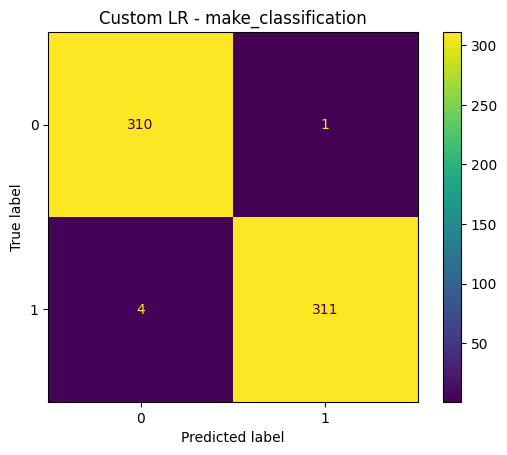

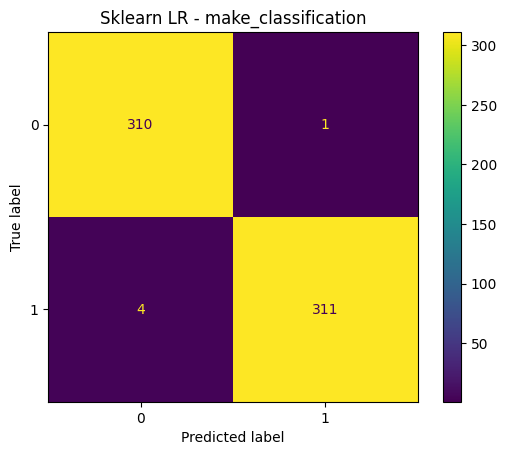

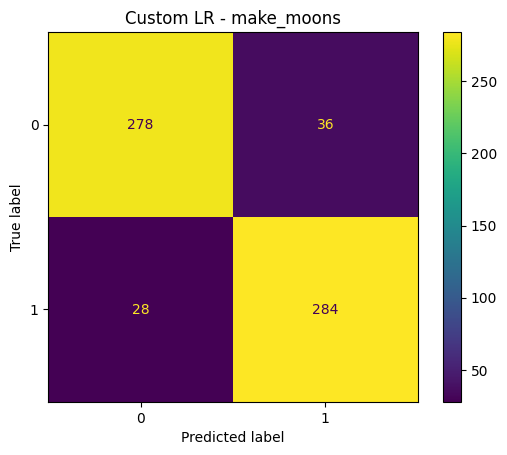

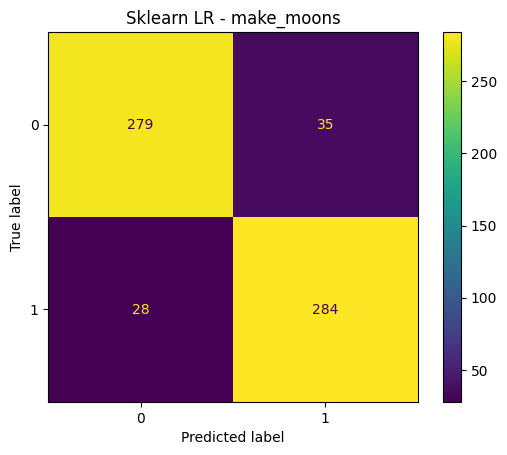

In [ ]:
# make_classification dataset
cm_impl = confusion_matrix(y_test, y_pred)
disp_impl = ConfusionMatrixDisplay(cm_impl)
disp_impl.plot()
plt.title("Custom LR - make_classification")
plt.show()

cm_skl = confusion_matrix(y_test, y_pred_skl)
disp_skl = ConfusionMatrixDisplay(cm_skl)
disp_skl.plot()
plt.title("Sklearn LR - make_classification")
plt.show()


# make_moons dataset
cm_impl_m = confusion_matrix(ym_test, ym_pred)
disp_impl_m = ConfusionMatrixDisplay(cm_impl_m)
disp_impl_m.plot()
plt.title("Custom LR - make_moons")
plt.show()

cm_skl_m = confusion_matrix(ym_test, ym_pred_skl)
disp_skl_m = ConfusionMatrixDisplay(cm_skl_m)
disp_skl_m.plot()
plt.title("Sklearn LR - make_moons")
plt.show()

In [76]:
name = ["Numerical make_classification", "Sklearn make_classification", "Numerical moons", "Sklearn moons"]
for i, cm in enumerate([cm_impl, cm_skl, cm_impl_m, cm_skl_m]):
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn+fp) # swoistosc
    sensitivity = tp / (tp+fn) # czulosc
    print(name[i])
    print(f"specificity: {specificity}")
    print(f"sensitivity: {sensitivity}\n")

Numerical make_classification
specificity: 0.9967845659163987
sensitivity: 0.9873015873015873

Sklearn make_classification
specificity: 0.9967845659163987
sensitivity: 0.9873015873015873

Numerical moons
specificity: 0.8853503184713376
sensitivity: 0.9102564102564102

Sklearn moons
specificity: 0.8885350318471338
sensitivity: 0.9102564102564102



In [71]:
# make_classification
fpr_impl, tpr_impl, _ = roc_curve(y_test, y_score)
auc_impl = auc(fpr_impl, tpr_impl)

fpr_skl, tpr_skl, _ = roc_curve(y_test, y_score_skl)
auc_skl = auc(fpr_skl, tpr_skl)

# make_moons
fpr_impl_m, tpr_impl_m, _ = roc_curve(ym_test, ym_score)
auc_impl_m = auc(fpr_impl_m, tpr_impl_m)

fpr_skl_m, tpr_skl_m, _ = roc_curve(ym_test, ym_score_skl)
auc_skl_m = auc(fpr_skl_m, tpr_skl_m)

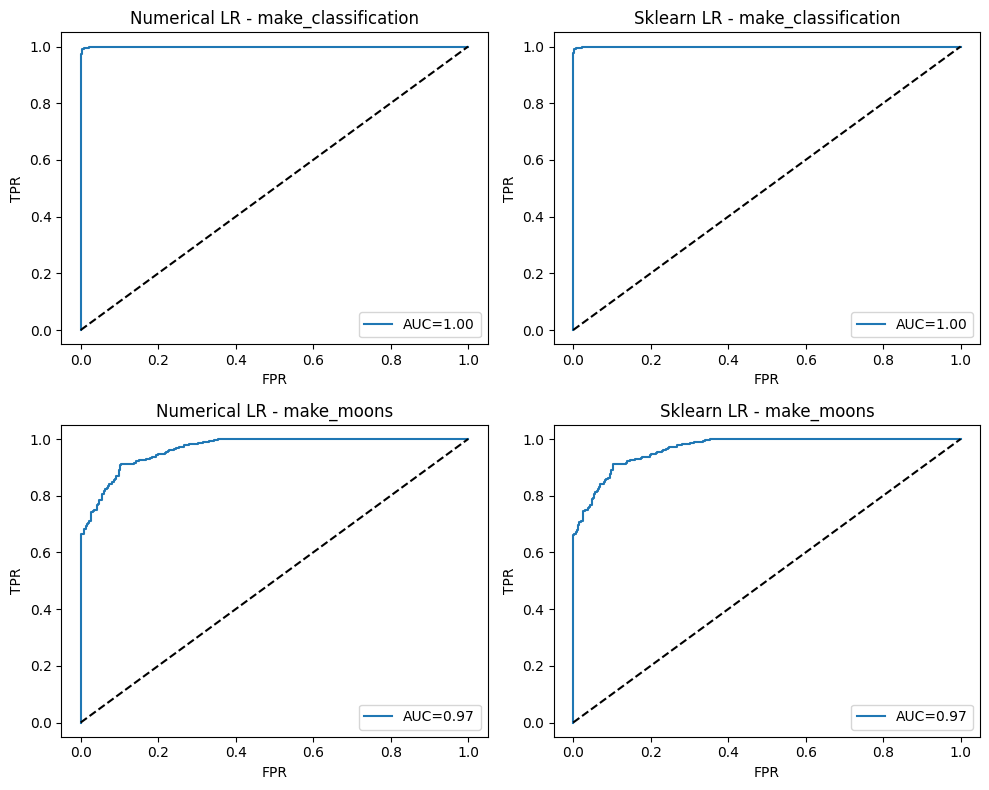

In [72]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0,0].plot(fpr_impl, tpr_impl, label=f"AUC={auc_impl:.2f}")
axes[0,0].plot([0,1],[0,1],'k--')
axes[0,0].set_title("Numerical LR - make_classification")
axes[0,0].set_xlabel("FPR"); axes[0,0].set_ylabel("TPR")
axes[0,0].legend(loc="lower right")

axes[0,1].plot(fpr_skl, tpr_skl, label=f"AUC={auc_skl:.2f}")
axes[0,1].plot([0,1],[0,1],'k--')
axes[0,1].set_title("Sklearn LR - make_classification")
axes[0,1].set_xlabel("FPR"); axes[0,1].set_ylabel("TPR")
axes[0,1].legend(loc="lower right")

axes[1,0].plot(fpr_impl_m, tpr_impl_m, label=f"AUC={auc_impl_m:.2f}")
axes[1,0].plot([0,1],[0,1],'k--')
axes[1,0].set_title("Numerical LR - make_moons")
axes[1,0].set_xlabel("FPR"); axes[1,0].set_ylabel("TPR")
axes[1,0].legend(loc="lower right")

axes[1,1].plot(fpr_skl_m, tpr_skl_m, label=f"AUC={auc_skl_m:.2f}")
axes[1,1].plot([0,1],[0,1],'k--')
axes[1,1].set_title("Sklearn LR - make_moons")
axes[1,1].set_xlabel("FPR"); axes[1,1].set_ylabel("TPR")
axes[1,1].legend(loc="lower right")

plt.tight_layout()
plt.show()